In [ ]:
!pip install pyyaml==5.1

!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html



     |████████████████████████████████| 274 kB 7.7 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=6cc216a133c9f357a97cdf7376642a8d7187993a7023c7cef1e4d864de4465db
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html
     |████████████████████████████████| 6.4 MB 11.7 MB/s 
     |████████████████████████████████| 49 kB 4.1 MB/s 
     |████████████████████████████████| 145 kB 16.8 MB/s 
     |████████████████████████████████| 130 kB 90.0 MB/s 
     |████████████████████████████████| 74 kB 4.6 MB/s 
     |████████████████████████████████| 743 kB 72.1 MB/s 
     |████████████████████████████████| 745 kB 65.9 MB/s 
     |█

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger() #to enable meaningful logs collection at output
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
import numpy as np
import cv2    #explore images
import random #randomly sample train data


1.9.0+cu102 True


In [ ]:
from detectron2.data.catalog import DatasetCatalog  #To Add TRAIN , VAL and TEST Data to the Registry
from detectron2.data import MetadataCatalog         #Additional Info About Datasets
from detectron2.utils.visualizer import Visualizer  #Visualize Images with Annotations
from detectron2.config import get_cfg               #Configuration sub-module for hyper-param settings
from detectron2 import model_zoo                    #provides variety of Image / object detection back-bone modules , state-of-art
from detectron2.engine import DefaultPredictor      #predictions/inferencing


In [ ]:
import os, json
from google.colab.patches import cv2_imshow 

In [ ]:
!cp -r /content/drive/MyDrive/Full_Train/output /root

In [ ]:
!cp -r /content/drive/MyDrive/PlotQA /root

In [ ]:
!mkdir /root/Data

In [ ]:
!tar -zxvf /root/PlotQA/TEST.tar.gz -C /root/Data

Streaming output truncated to the last 5000 lines.
TEST/png/9525.png
TEST/png/27535.png
TEST/png/2324.png
TEST/png/24199.png
TEST/png/5976.png
TEST/png/21791.png
TEST/png/28934.png
TEST/png/17043.png
TEST/png/4326.png
TEST/png/21901.png
TEST/png/18113.png
TEST/png/27814.png
TEST/png/20542.png
TEST/png/10557.png
TEST/png/14240.png
TEST/png/9661.png
TEST/png/22899.png
TEST/png/20728.png
TEST/png/16651.png
TEST/png/6325.png
TEST/png/24477.png
TEST/png/30715.png
TEST/png/23348.png
TEST/png/14643.png
TEST/png/17510.png
TEST/png/3392.png
TEST/png/23341.png
TEST/png/1946.png
TEST/png/32301.png
TEST/png/10984.png
TEST/png/2385.png
TEST/png/30516.png
TEST/png/13308.png
TEST/png/17750.png
TEST/png/28523.png
TEST/png/8054.png
TEST/png/25213.png
TEST/png/28977.png
TEST/png/29057.png
TEST/png/12706.png
TEST/png/12463.png
TEST/png/791.png
TEST/png/5352.png
TEST/png/20372.png
TEST/png/1647.png
TEST/png/19889.png
TEST/png/7593.png
TEST/png/24825.png
TEST/png/29991.png
TEST/png/789.png
TEST/png/13106.p

In [ ]:
from detectron2.data.datasets import register_coco_instances

register_coco_instances("Test_1", {}, "/root/Work/Data/PlotQA/annotations/test_annotations.json", "/root/Data/TEST/png")

In [ ]:
config = get_cfg() #default config_object  of detectron2
config.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))

'''
Now is the time for model selection

Since the task is about object detection within an image ,
We need a backbone state-of-the-art network to get the feature map,
on which the further network will act upon

'''
config.DATASETS.TRAIN = ()
config.DATASETS.TEST = ('Test_1')
config.NUM_GPUS = 1
config.DATALOADER.NUM_WORKERS = 2
config.MODEL.WEIGHTS = "/root/output/model_final.pth"  # Let training initialize from model zoo
config.SOLVER.BASE_LR = 0.0075
 # Warmup steps are just a few updates with low learning rate before / at the beginning of training. After this warmup, you use the regular learning rate (schedule) to train your model to convergence.
config.SOLVER.MAX_ITER = 5000 #adjust up if val mAP is still rising, adjust down if overfit
config.SOLVER.STEPS = (1500,3800)
config.SOLVER.GAMMA = 0.05
config.SOLVER.IMS_PER_BATCH = 2
config.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512
config.MODEL.ROI_HEADS.NUM_CLASSES = 11
config.TEST.EVAL_PERIOD = 50
config.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9  # set the testing threshold for this model



print(config.dump())

CUDNN_BENCHMARK: false
DATALOADER:
  ASPECT_RATIO_GROUPING: true
  FILTER_EMPTY_ANNOTATIONS: true
  NUM_WORKERS: 2
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: []
  PROPOSAL_FILES_TRAIN: []
  TEST: Test_1
  TRAIN: []
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: false
    SIZE:
    - 0.9
    - 0.9
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN:
  - 640
  - 672
  - 704
  - 736
  - 768
  - 800
  MIN_SIZE_TRAIN_SAMPLING: choice
  RANDOM_FLIP: horizontal
MODEL:
  ANCHOR_GENERATOR:
    ANGLES:
    - - -90
      - 0
      - 90
    ASPECT_RATIOS:
    - - 0.5
      - 1.0
      - 2.0
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES:
    - - 32
    - - 64
    - - 128
    - - 256
    - - 512
  BACKBONE:
    FREEZE_AT: 2
    NAME: build_resnet_fpn_backbone
  DEVICE: c

In [ ]:
predictor = DefaultPredictor(config)
test_metadata = MetadataCatalog.get("Test_1")
from detectron2.utils.visualizer import ColorMode
import glob


In [ ]:
def Custom_Tester(filename):
  
  for imageName in glob.glob('/content/drive/MyDrive/Flask/Test_Images/*'):
    im = cv2.imread(imageName)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                  metadata=test_metadata, 
                  scale=1
                  )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])
    cv2.imwrite("/content/drive/MyDrive/Flask/Test_Images/" + "t_" + filename , out.get_image()[:, :, ::-1])

In [ ]:
!pip install flask-ngrok


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://0d56-35-197-97-165.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [01/Sep/2021 09:13:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2021 09:13:36] "GET /favicon.ico HTTP/1.1" 404 -
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  re

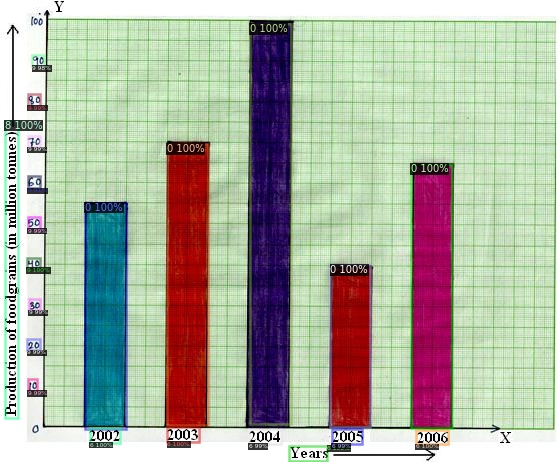

127.0.0.1 - - [01/Sep/2021 09:13:54] "POST /Capstone/Test HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2021 09:13:54] "GET /Capstone/Test HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2021 09:13:54] "GET /Test_Images/real_bar_graph.jpg HTTP/1.1" 200 -


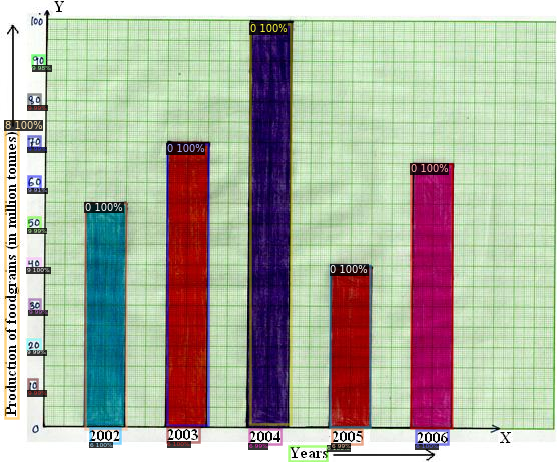

127.0.0.1 - - [01/Sep/2021 09:13:59] "POST /Capstone/Test HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2021 09:14:00] "GET /Test_Images/t_real_bar_graph.jpg HTTP/1.1" 200 -


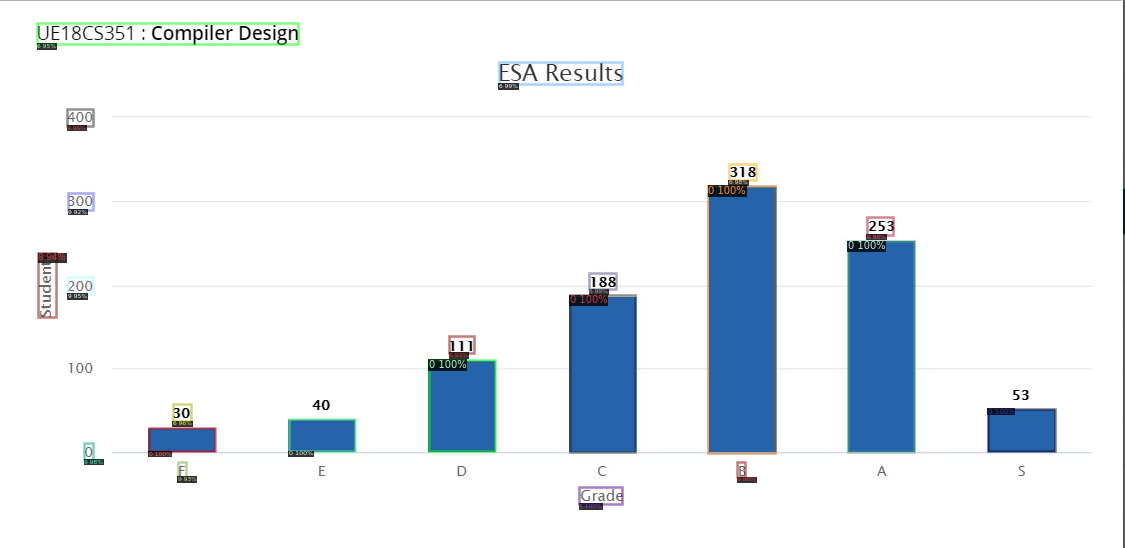

127.0.0.1 - - [01/Sep/2021 09:14:40] "POST /Capstone/Test HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2021 09:14:41] "GET /Test_Images/pesu.JPG HTTP/1.1" 200 -


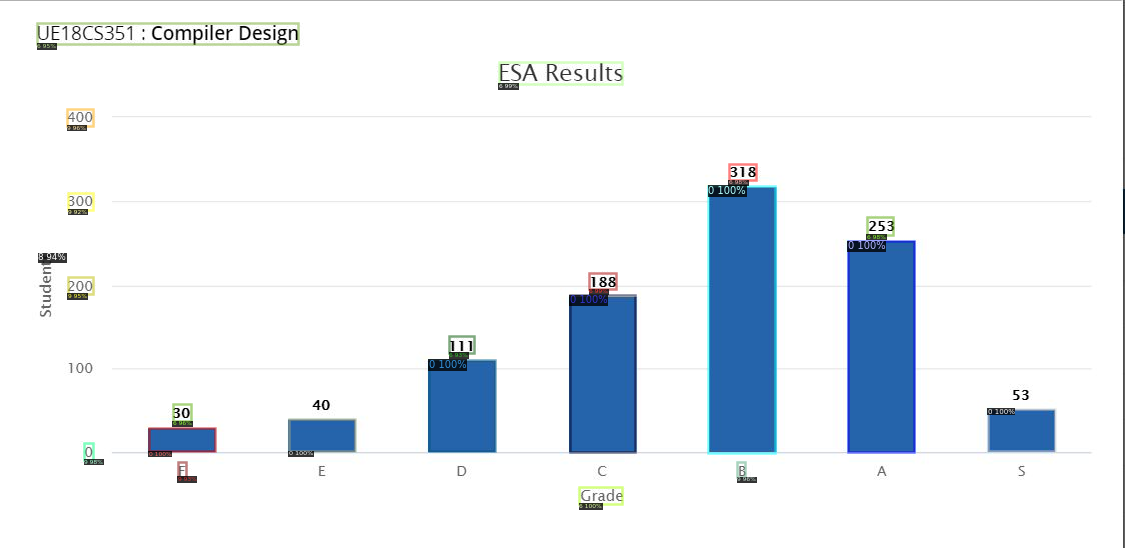

127.0.0.1 - - [01/Sep/2021 09:14:45] "POST /Capstone/Test HTTP/1.1" 200 -
127.0.0.1 - - [01/Sep/2021 09:14:46] "GET /Test_Images/t_pesu.JPG HTTP/1.1" 200 -


In [ ]:
from flask import Flask , render_template , request , url_for
from flask_ngrok import run_with_ngrok
import os

app = Flask(__name__ , template_folder = '/content/drive/MyDrive/Flask/' , static_folder=  '/content/drive/MyDrive/Flask/Test_Images')

run_with_ngrok(app)   

app.config["IMAGE_UPLOADS"] = '/content/drive/MyDrive/Flask/Test_Images'

def cleanup():

    dir = '/content/drive/MyDrive/Flask/Test_Images/'
    filelist = glob.glob(os.path.join(dir, "*"))
    for f in filelist:
      
      os.remove(f)
  
@app.route("/")
def home():
    return render_template("UI.html")

@app.route("/Capstone/Test" , methods = ['GET','POST'])
def Test():

    

    if request.method == 'POST' :

      if request.files != None :

        cleanup()

        test_image = request.files['Test_Image']
        test_image.save(os.path.join(app.config['IMAGE_UPLOADS'] , test_image.filename))

        Custom_Tester(test_image.filename)

       

        return render_template('Result.html' , test = test_image.filename , result = 't_'+test_image.filename)

    return "FAILURE"


    
app.run()

In [ ]:
!cp  /root/Data/TEST/png/11468.png /content